# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=b1db93c67e7e95bae1fdca941dc2d097'

In [12]:
weather_response = requests.get(target_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))



{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "sunrise": 1590541131,
        "sunset": 1590602096,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 89
            },
            "dt": 1590602400,
            "dt_txt": "2020-05-27 18:00:00",
            "main": {
                "feels_like": 287.93,
                "grnd_level": 1006,
                "humidity": 61,
                "pressure": 1023,
                "sea_level": 1023,
                "temp": 289.41,
                "temp_kf": 0.83,
                "temp_max": 289.41,
                "temp_min": 288.58
            },
            "rain": {
                "3h": 0.46
            },
            "sys": {
                "pod": "n"
            },
            "weather": [
                {
                 

In [13]:
print(weather_json['city']['name'])

Moscow


In [14]:
##set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("END")

Processing record 1 of Set 1 | mehamn
Processing record 2 of Set 1 | bulgan
Processing record 3 of Set 1 | tasiilaq
Processing record 4 of Set 1 | cape town
Processing record 5 of Set 1 | avarua
Processing record 6 of Set 1 | busselton
Processing record 7 of Set 1 | albany
Processing record 8 of Set 1 | rikitea
Processing record 9 of Set 1 | san quintin
Processing record 10 of Set 1 | pangnirtung
Processing record 11 of Set 1 | takoradi
Processing record 12 of Set 1 | georgetown
Processing record 13 of Set 1 | puerto ayora
Processing record 14 of Set 1 | roma
Processing record 15 of Set 1 | buala
Processing record 16 of Set 1 | embu
Processing record 17 of Set 1 | kapaa
Processing record 18 of Set 1 | athabasca
Processing record 19 of Set 1 | ushuaia
Record not found
Processing record 20 of Set 1 | miri
Processing record 21 of Set 1 | guane
Processing record 22 of Set 1 | cabo san lucas
Processing record 23 of Set 1 | iquitos
Processing record 24 of Set 1 | kodiak
Processing record 25 

Processing record 190 of Set 1 | clinton
Processing record 191 of Set 1 | semnan
Processing record 192 of Set 1 | itarana
Processing record 193 of Set 1 | sakaraha
Processing record 194 of Set 1 | taoudenni
Processing record 195 of Set 1 | upernavik
Processing record 196 of Set 1 | victor harbor
Processing record 197 of Set 1 | rodez
Record not found
Record not found
Processing record 198 of Set 1 | tuy hoa
Processing record 199 of Set 1 | mahebourg
Processing record 200 of Set 1 | goderich
Processing record 201 of Set 1 | necochea
Processing record 202 of Set 1 | vao
Processing record 203 of Set 1 | mount isa
Processing record 204 of Set 1 | neyshabur
Processing record 205 of Set 1 | bojnurd
Processing record 206 of Set 1 | axim
Processing record 207 of Set 1 | oskaloosa
Processing record 208 of Set 1 | zhezkazgan
Processing record 209 of Set 1 | betsiamites
Processing record 210 of Set 1 | halifax
Processing record 211 of Set 1 | kulhudhuffushi
Processing record 212 of Set 1 | kieta


Processing record 378 of Set 1 | tigil
Processing record 379 of Set 1 | juba
Record not found
Processing record 380 of Set 1 | chihuahua
Processing record 381 of Set 1 | roald
Processing record 382 of Set 1 | socorro
Processing record 383 of Set 1 | tocopilla
Processing record 384 of Set 1 | ryotsu
Processing record 385 of Set 1 | dongsheng
Record not found
Processing record 386 of Set 1 | waipawa
Record not found
Processing record 387 of Set 1 | atar
Processing record 388 of Set 1 | jieshi
Processing record 389 of Set 1 | high prairie
Processing record 390 of Set 1 | biak
Processing record 391 of Set 1 | dwarka
Processing record 392 of Set 1 | lalin
Processing record 393 of Set 1 | carauari
Processing record 394 of Set 1 | klaksvik
Processing record 395 of Set 1 | benghazi
Processing record 396 of Set 1 | ahipara
Processing record 397 of Set 1 | andenes
Processing record 398 of Set 1 | wasilla
Processing record 399 of Set 1 | nanortalik
Processing record 400 of Set 1 | tukums
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  Wind Speed  \
0     Mehamn   71.0357    27.8492     47.10        77          84        6.60   
1     Bulgan   48.8125   103.5347     49.95        84         100       11.39   
2   Tasiilaq   65.6145   -37.6368     38.89        71          66        3.44   
3  Cape Town  -33.9258    18.4232     58.48        70          83       16.58   
4     Avarua  -21.2078  -159.7750     74.68        77          17        6.73   

  Country        Date  
0      NO  1590602400  
1      MN  1590602400  
2      GL  1590602400  
3      ZA  1590602400  
4      CK  1590602400

In [17]:
# Export the City_Data into a csv
weather_data.to_csv(r'output_data\my_weather_data.csv')
# Show Record Count
record_count = len(weather_data)
record_count

535

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

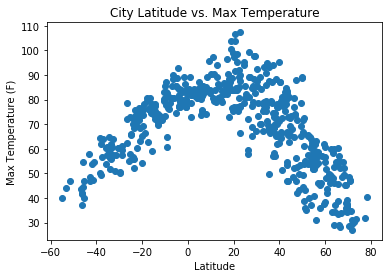

In [18]:
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

#This code is analyzing the correlation between a cities latitude and its max temperature.

#### Latitude vs. Humidity Plot

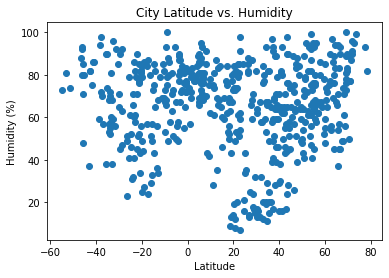

In [19]:
scatlat = weather_data["Latitude"]
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()
#This code is analyzing the correlation between a cities latitude and its percentage of humidity.

#### Latitude vs. Cloudiness Plot

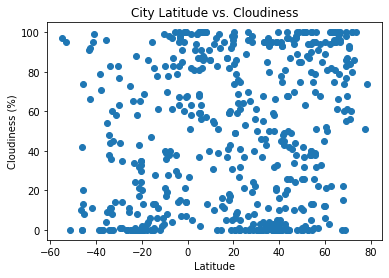

In [20]:
scatlat = weather_data["Latitude"]
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()
#This code is analyzing the correlation between a cities latitude and its percentage of cloudiness.

#### Latitude vs. Wind Speed Plot

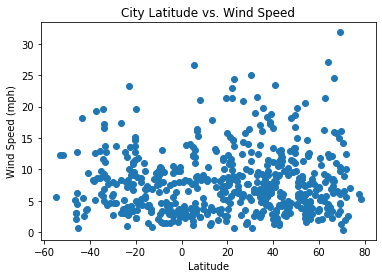

In [21]:
scatlat = weather_data["Latitude"]
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()
#This code is analyzing the correlation between a cities latitude and its wind speed.

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
0       Mehamn   71.0357    27.8492     47.10        77          84   
1       Bulgan   48.8125   103.5347     49.95        84         100   
2     Tasiilaq   65.6145   -37.6368     38.89        71          66   
6       Albany   42.6001   -73.9662     83.19        55          18   
8  San Quintín   30.4833  -115.9500     73.29        64           0   

   Wind Speed Country        Date  
0        6.60      NO  1590602400  
1       11.39      MN  1590602400  
2        3.44      GL  1590602400  
6        9.17      US  1590602400  
8       11.32      MX  1590602400

In [24]:
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]
southlat_df.head()

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
3      Cape Town  -33.9258    18.4232     58.48        70          83   
4         Avarua  -21.2078  -159.7750     74.68        77          17   
5      Busselton  -33.6500   115.3333     60.24        81          11   
7        Rikitea  -23.1203  -134.9692     75.76        82           0   
12  Puerto Ayora   -0.7393   -90.3518     76.87        75          67   

    Wind Speed Country        Date  
3        16.58      ZA  1590602400  
4         6.73      CK  1590602400  
5        11.12      AU  1590602400  
7        10.11      PF  1590602400  
12       10.31      EC  1590602400

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7956948968770605


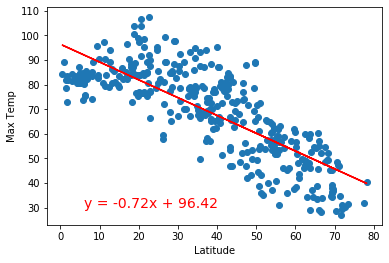

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8806839251318156


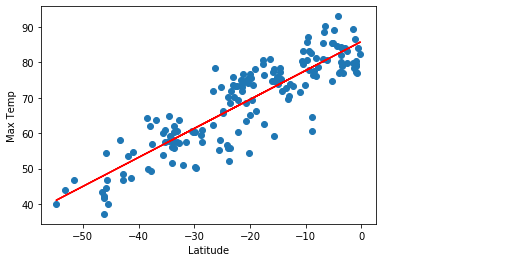

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')
#The high r value indicates a strong positive correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09584566903669309


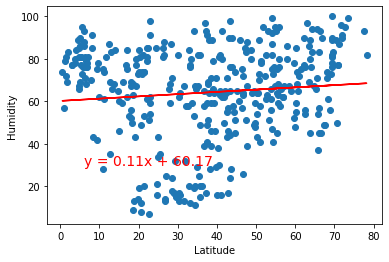

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008161137056139045


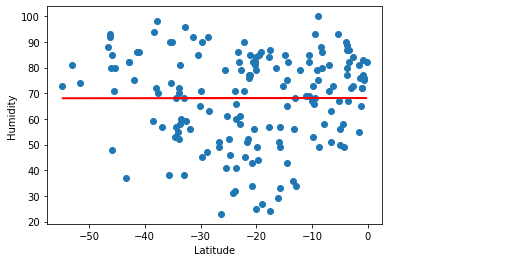

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')
#The low r values indicate a weak to no relationship between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06713274871984558


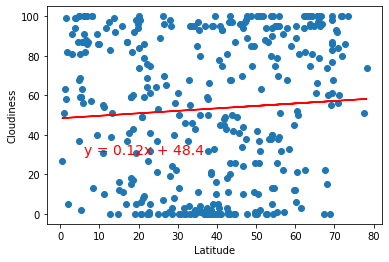

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))
plt.savefig('northerncloudlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1698568500887021


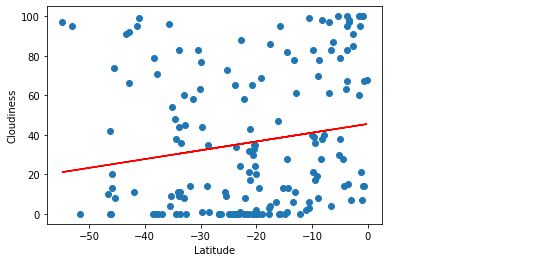

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

#The low r values indicate a weak positive relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016072683963088512


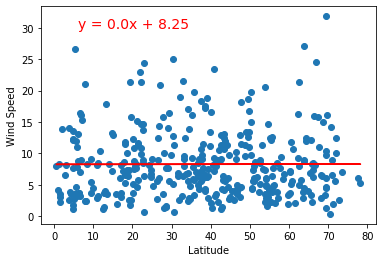

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2284190842127959


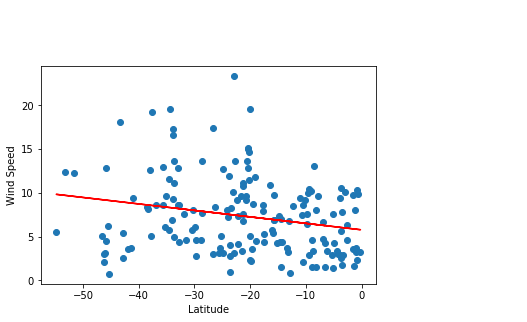

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')

In [ ]:
#The low r values indicate that there is no real relationship between wind speed and latitude. 
#The difference between the hemispheres doesn't seem to be significant enough to comment upon.